In [3]:
# importing relevant libraries (inspired by: https://www.kaggle.com/code/parulpandey/visualizing-kannada-mnist-with-t-sne/notebook)
from time import time

import numpy as np
import pandas as pd

import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

sns.set(style = 'white', context = 'notebook', rc = {'figure.figsize': (14,10)})

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [5]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [13]:
X = digits.data

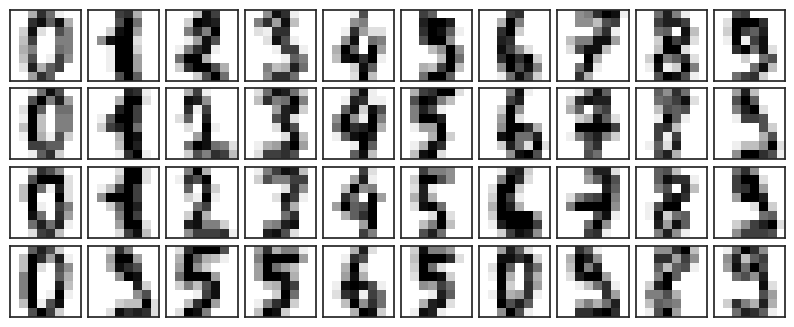

In [14]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(X)

In [15]:
#standardizing the data

X_std = StandardScaler().fit_transform(X)

print(X_std.shape)

(1797, 64)


In [27]:
# applying tSNE
%time

tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = X_std.shape[0]/10, n_iter = 250).fit_transform(X_std)

CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 12.2 µs
[t-SNE] Computing 540 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.002s...
[t-SNE] Computed neighbors for 1797 samples in 1.643s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 3.448056
[t-SNE] KL divergence after 50 iterations with early exaggeration: 55.983547
[t-SNE] KL divergence after 250 iterations: 0.602619


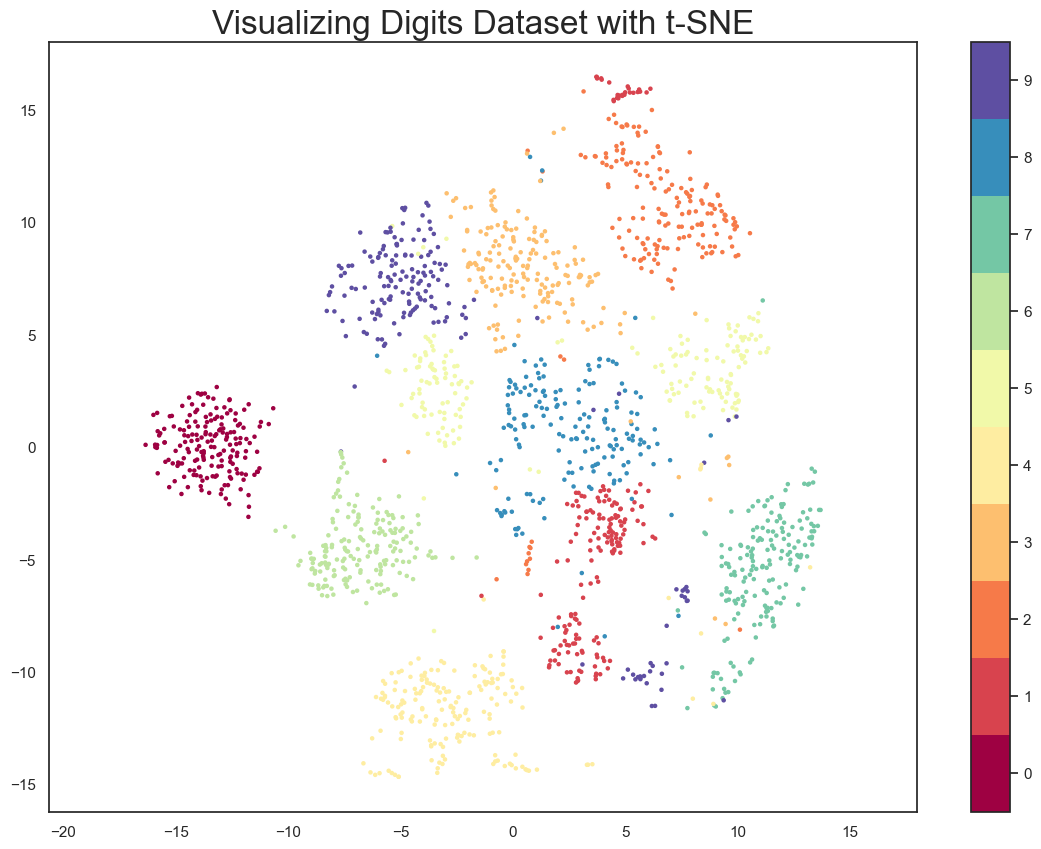

In [28]:
#viualizing tsne

plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c = digits.target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Digits Dataset with t-SNE', fontsize=24);

In [26]:
#using PCA to reduce the dimensionality of the data before applying tSNE

from sklearn.decomposition import PCA
pca_50 = PCA(n_components = 50)

pca_result_50 = pca_50.fit_transform(X_std)

In [31]:
%time 
pca_tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = X_std.shape[0]/10, n_iter = 250).fit_transform(pca_result_50)

CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 11 µs
[t-SNE] Computing 540 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.572s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 3.428073
[t-SNE] KL divergence after 50 iterations with early exaggeration: 56.014336
[t-SNE] KL divergence after 250 iterations: 0.599911


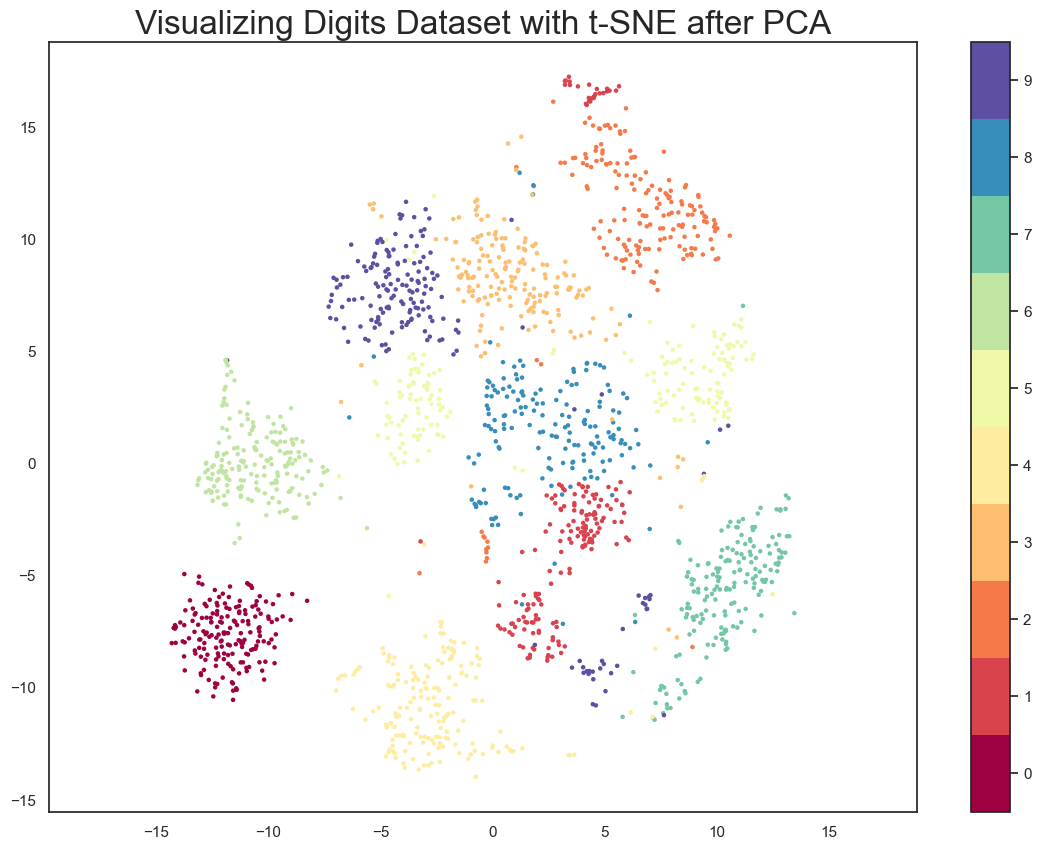

In [32]:
#viualizing tsne after PCA

plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c = digits.target, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Digits Dataset with t-SNE after PCA', fontsize=24);

In [33]:
#plotting in 3D with Matplotlib

%time
pca_tsne_3d = TSNE(random_state = 42, n_components = 3, verbose = 0, perplexity = X_std.shape[0]/10, n_iter = 250).fit_transform(pca_result_50)

CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 10 µs


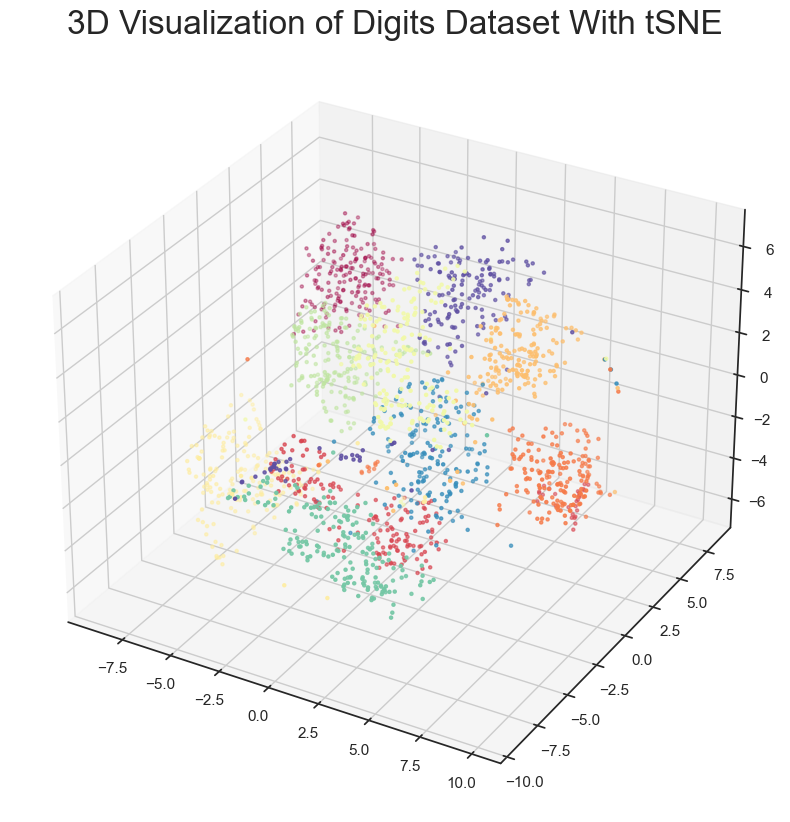

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(pca_tsne_3d[:, 0], pca_tsne_3d[:, 1], pca_tsne_3d[:, 2], s = 5, c = digits.target, cmap = 'Spectral')

plt.title('3D Visualization of Digits Dataset With tSNE', fontsize = 24)
plt.show()

In [36]:
#Replicating the previous cell in plotly, because practice!

x = pca_tsne_3d[:, 0]
y = pca_tsne_3d[:, 1]
z = pca_tsne_3d[:, 2]

fig = go.Figure(data = [go.Scatter3d(
    x = x,
    y = y,
    z = z,
    mode = 'markers',
    marker = dict(
        size = 12,
        color = x,
        colorscale = 'Spectral',
        opacity = 0.8
    )
)])

fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))
fig.show()

Check out the tutorial linked in the 1st cell for a cool example of how to use Bokeh to embed custom tooltips in plots, letting you hover over each point and viewing the corresponding image!